In [20]:
import numpy as np
from  Functions import *
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML
%matplotlib inline
plt.rcParams["figure.figsize"] = 12.8, 9.6

In [21]:
#There are many possibe ways to generate random float. In this solution numpy.random.uniform was used 
#Functions names:
#['sphere', 'ackley', 'rastrigin', 'rosenbrock', 'griewank', 'schwefel', 'levy', 'micha','zakhar']

In [22]:
#algorithm of quicksorting for evaluatino of the best neighbor
def quicksort(x_rnd, func_name):
    func = func_dic[func_name][0] #define function
    if len(x_rnd) < 2:  #define basic case
        return x_rnd
    else:
        pivot = x_rnd[0] #shoce pivot from all possible solutions of x
        less = [i for i in x_rnd[1:] if func(i) < func(pivot)] #sorting by more optimal and less optimal solutions
        greater = [i for i in x_rnd[1:] if func(i) > func(pivot)]
        return quicksort(less, func_name) + [pivot] + quicksort(greater, func_name) #repeat function 

In [23]:
#generate a plot with function and with optimal points 
def make_plt(z_opt, XX, func_name):
    
    x1_opt = [XX[i][0] for i in range(len(XX))] #extract data
    x2_opt = [XX[i][1] for i in range(len(XX))]
        
    func, (low_lim, high_lim) = func_dic[func_name]

    x1 = np.linspace(low_lim, high_lim, 100) #generate coordinates for ploting func
    x2 = np.linspace(low_lim, high_lim, 100)

    xx1, xx2 = np.meshgrid(x1, x2, sparse=True) #grid of coordinates, result - shape1 = (1, 100), shape2 = (100, 1)
    z = np.empty([xx1.shape[1], xx2.shape[0]]) #empty matrix (100, 100)

    for i in range(xx2.shape[0]): #filling z matrix using preprepared functins
        for j in range(xx1.shape[1]):
            z[i, j] = func([xx1[:, j][0] , xx2[i][0]])

    ax = plt.axes(projection='3d') #create 3D template
    ax.scatter3D(x1_opt, x2_opt, z_opt, color = "red") #plotting optimal points
    ax.plot_surface(xx1, xx2, z, cmap='ocean', alpha = 0.3) #plotting function

In [54]:
#function for creating animation of optimisation process
def make_animation(z_opt, XX, func_name):
    
    x1_opt = [XX[i][0] for i in range(len(XX))] #extract data
    x2_opt = [XX[i][1] for i in range(len(XX))]
   
    func, (low_lim, high_lim) = func_dic[func_name]
    
    fig = plt.figure() #define figure
    ax = fig.add_subplot(111, projection='3d')
    camera = Camera(fig) #use simple library from github

    x1 = np.linspace(low_lim, high_lim, 100) #generate coordinates for ploting func
    x2 = np.linspace(low_lim, high_lim, 100)

    xx1, xx2 = np.meshgrid(x1, x2, sparse=True) #grid of coordinates, result - shape1 = (1, 100), shape2 = (100, 1)
    z = np.empty([xx1.shape[1], xx2.shape[0]]) #empty matrix (100, 100)

    for i in range(xx2.shape[0]): #filling z matrix using preprepared functins. ?????? can be better solution
        for j in range(xx1.shape[1]):
            z[i, j] = func([xx1[:, j][0] , xx2[i][0]])

    for i in range(len(z_opt)): #generate a sequence of snapshots

        ax.plot_wireframe(xx1, xx2, z, cmap='ocean') #plotting function
        ax.scatter3D(x1_opt[i], x2_opt[i], z_opt[i], color = "red") #plotting optimal points
        plt.xlim(low_lim, high_lim)
        plt.ylim(low_lim, high_lim)
        ax.set_zlim(0, z.max())

        camera.snap() 

    animation = camera.animate() #make an animation from snapshots
    return HTML(animation.to_html5_video()) 

In [55]:
#Algorithm is an imitation of annealing
# k - is a size of a group

def annealing(func_name = 'sphere', dimension = 2, std = 0.1, k = 1, 
              T_min = 0.5, T_0 = 100, alpha = 0.95): 
    
    func, (low_lim, high_lim) = func_dic[func_name] #unpacking of optimizing function and its boundaries
    T = T_0   
    x = np.random.uniform(low_lim, high_lim, dimension) #generate initial random vector of x
    value = func(x) #iniciate best value
    
    all_best_x = [list(x)]
    all_best_value = [value]
    
    if k < 1:
        return print('Number of neighbours must be greater then zero')
    
        
    while T > T_min:  #loop to simmulate change in temperature
       
        mu = x  #define mu according to the algorithm rules
        x_rnd = np.random.normal(mu, std, (k, dimension))  #generate 2D normaly destributed array 
        x_rnd_best = quicksort(x_rnd, func_name)[0] #sort possible solutions and choose optimal one
            
        temp_value = func(x_rnd_best) #calculate function value at x
        
        if temp_value < value: #compere calculated value with best one
            x = x_rnd_best
            
            all_best_x.append(list(x)) #save all best values for x anf f(x)
            all_best_value.append(func(x))
        else: 
            r = np.random.uniform(0,1) #genarate random number to simulate accident
            P = np.exp(-(temp_value-value)/T) #define probability for changing result
            if r < P: # if accident is under the probability, we accept evven worse solution
                x = x_rnd_best
                all_best_x.append(list(x)) #save all best values for x anf f(x)
                all_best_value.append(func(x))
        T = T*alpha
    
    return [all_best_value, all_best_x, func_name, [value, x]]

In [77]:
Z, XX , func_name, *_ = annealing(k = 5, func_name = 'ackley', T_0 = 200, std = 1)

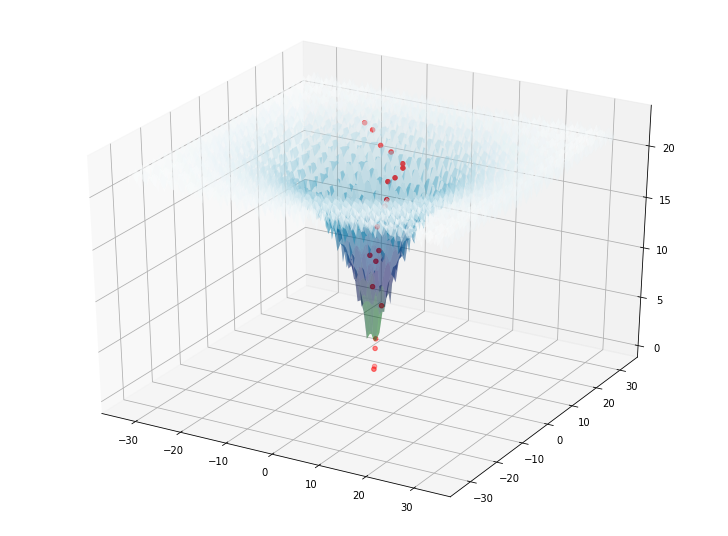

In [78]:
make_plt(Z, XX, func_name)

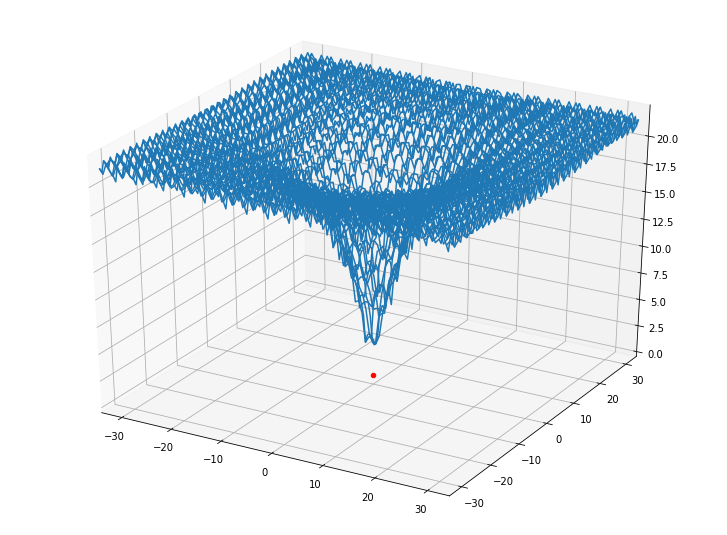

In [79]:
make_animation(Z, XX, func_name)